In [1]:
import warnings
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from tqdm import tqdm

# mute warnings

warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")
load_dotenv()

True

In [2]:
with open('../data/trips_data.csv', 'rb') as f:
    df = pd.read_csv(f)
print(f"Number of days in the dataset: {df['date'].nunique()}")

Number of days in the dataset: 70


# Data Dictionary 
|Column Name|Description|
|---|---|
|trip_id|Unique identifier for the whole trip|
|subtrip_id|Unique identifier for each sub-trip|
|date|Date of the trip|
|day_of_week|Day of the week for the trip (0=Monday, 6=Sunday)|
|train_id|Identifier for the train|
|train_type|Type of the train (e.g., TGV, TNR)|
|initial_departure_station|Station where the trip starts|
|final_arrival_station|Station where the trip ends|
|route|Route of the trip, formatted as "initial_departure_station - final_arrival_station"|
|current_station|Name of the current station|
|next_station|Name of the next station in the trip|
|sequence|Sequence number of the station in the trip|
|number_of_stations|Total number of stations in the trip|
|trip_duration|Total duration of the trip (in minutes)|
|subtrip_duration|Duration of the sub-trip (in minutes)|
|trip_distance|Total distance of the trip (in kilometers)|
|subtrip_distance|Distance of the sub-trip (in kilometers)|
|travelled_distance|Distance travelled so far in the trip (in kilometers)|
|remaining_distance|Distance remaining to the final destination (in kilometers)|
|scheduled_arrival_time|Scheduled arrival time at the current station|
|scheduled_departure_time|Scheduled departure time from the current station|
|actual_arrival_time|Actual arrival time at the current station|
|actual_departure_time|Actual departure time from the current station|
|arrival_delay|Delay in arrival time compared to the Scheduled time (in minutes)|
|departure_delay|Delay in departure time compared to the Scheduled time (in minutes)|
|departure_hour|Hour of the day when the train departs from the current station|
|arrival_hour|Hour of the day when the train arrives at the current station|
|scheduled_dwelling_time|Scheduled time spent at the current station (in minutes)|
<!-- |actual_dwelling_time|Actual time spent at the current station (in minutes)| -->
<!-- |dwelling_delay|Difference between actual and Scheduled dwelling time (in minutes)| -->


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(131858, 52)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131858 entries, 0 to 131857
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   trip_id                            131858 non-null  object 
 1   subtrip_id                         131858 non-null  object 
 2   date                               131858 non-null  object 
 3   day_of_week                        131858 non-null  int64  
 4   train_id                           131858 non-null  object 
 5   train_type                         131858 non-null  object 
 6   initial_departure_station          131858 non-null  object 
 7   final_arrival_station              131858 non-null  object 
 8   route                              131858 non-null  object 
 9   current_station                    131858 non-null  object 
 10  next_station                       131858 non-null  object 
 11  sequence                           1318

In [5]:
df.sort_values(by=['date', 'trip_id', 'sequence'], inplace=True)
df.head(10)

,trip_id,subtrip_id,date,day_of_week,train_id,train_type,initial_departure_station,final_arrival_station,route,current_station,...,dew_point_on_arrival,apparent_temperature_on_arrival,precipitation_on_arrival,visibility_on_arrival,wind_speed_on_arrival,wind_direction_on_arrival,wind_gusts_on_arrival,uv_index_on_arrival,cloud_cover_on_arrival,surface_pressure_on_arrival
7905,00158ccb35fe270c31c586dc94fcb3ee47a8c0b6c69ac3...,0c71df47ff85a5e4b74d85b85da49849ff571707b71018...,2025-05-18,6,1053,GV,CASA VOYAGEURS,TANGER,CASA VOYAGEURS - TANGER,CASA VOYAGEURS,...,14.803712,19.944270,0.0,39240.0,9.832680,336.25050,29.160000,1.80,51.0,1014.51300
7906,00158ccb35fe270c31c586dc94fcb3ee47a8c0b6c69ac3...,0f4c572b1cbced95d5bf7595b852d20de91f0984d44f3d...,2025-05-18,6,1053,GV,CASA VOYAGEURS,TANGER,CASA VOYAGEURS - TANGER,RABAT AGDAL,...,14.320531,19.614630,0.0,41100.0,7.421590,320.90613,27.359999,0.55,64.0,1014.92645
7907,00158ccb35fe270c31c586dc94fcb3ee47a8c0b6c69ac3...,3d19836faa3fbfb1edd5d1a3cb5a8fd0c39cf9260e35bd...,2025-05-18,6,1053,GV,CASA VOYAGEURS,TANGER,CASA VOYAGEURS - TANGER,KENITRA,...,13.764226,18.735558,0.0,38340.0,5.154416,282.09473,18.000000,0.00,100.0,1016.70390
109332,035561dd482fd4dd62245ab7e16352d4e0c9c00cc2bc79...,a3adc9d70fd839cfb19adb96b4cd7b298dc46f095792d2...,2025-05-18,6,A11,TNR,CASA PORT,AEROPORT MED V,CASA PORT - AEROPORT MED V,CASA PORT,...,15.334039,20.303095,0.0,28920.0,6.638072,319.39877,19.440000,2.05,85.0,1013.37600
109333,035561dd482fd4dd62245ab7e16352d4e0c9c00cc2bc79...,b7306a0963aaef83d71916915448a490a0e3bca9fae01c...,2025-05-18,6,A11,TNR,CASA PORT,AEROPORT MED V,CASA PORT - AEROPORT MED V,CASA VOYAGEURS,...,14.954290,19.756977,0.0,32160.0,6.696387,323.74606,19.440000,2.05,82.0,1009.82740
109334,035561dd482fd4dd62245ab7e16352d4e0c9c00cc2bc79...,2704eb05250dcdb4f6236b0a5223781cea7622c8650d40...,2025-05-18,6,A11,TNR,CASA PORT,AEROPORT MED V,CASA PORT - AEROPORT MED V,CASA OASIS,...,15.154264,19.184740,0.0,16020.0,4.334974,311.63345,11.520000,2.05,93.0,993.15290
62036,040f868c2137ae74b7a5957997425b96539ca747ebf5ab...,fc185cc4ff36fc9ed71b6985ff81af05f6d94a78272f77...,2025-05-18,6,501,TLR,FES,TANGER,FES - TANGER,FES,...,13.239010,23.435890,0.0,64240.0,10.931203,342.75845,20.880001,5.80,0.0,962.35095
62037,040f868c2137ae74b7a5957997425b96539ca747ebf5ab...,cd46476ad230deaaed5a604ca7c76d58ed9a604c340b35...,2025-05-18,6,501,TLR,FES,TANGER,FES - TANGER,AIN TAOUJDATE,...,12.685743,23.584959,0.0,65900.0,9.290511,324.46225,18.720000,5.80,0.0,949.35736
62038,040f868c2137ae74b7a5957997425b96539ca747ebf5ab...,fe151d14fa982135456ee6c036fabea88507992d44481e...,2025-05-18,6,501,TLR,FES,TANGER,FES - TANGER,SEBAA AIOUN,...,13.655694,22.350763,0.0,51740.0,9.178235,311.82007,24.840000,5.75,9.0,955.06010
62039,040f868c2137ae74b7a5957997425b96539ca747ebf5ab...,e2dcdfa4bcdbea0479b26c4a43bd07a73158b3a9bf7344...,2025-05-18,6,501,TLR,FES,TANGER,FES - TANGER,MEKNES,...,13.735424,22.463404,0.0,51740.0,9.178235,311.82007,24.840000,5.75,9.0,956.50170


In [6]:
# # Difference between Scheduled and actual dwelling time
# plt.figure(figsize=(20, 8))
# sns.lineplot(data=df, x='date', y='scheduled_dwelling_time', label='Scheduled Dwelling Time', marker='o')
# sns.lineplot(data=df, x='date', y='actual_dwelling_time', label='Actual Dwelling Time', marker='o')
# plt.title('Scheduled vs Actual Dwelling Time')
# plt.xlabel('Date')
# plt.ylabel('Dwelling Time (minutes)')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

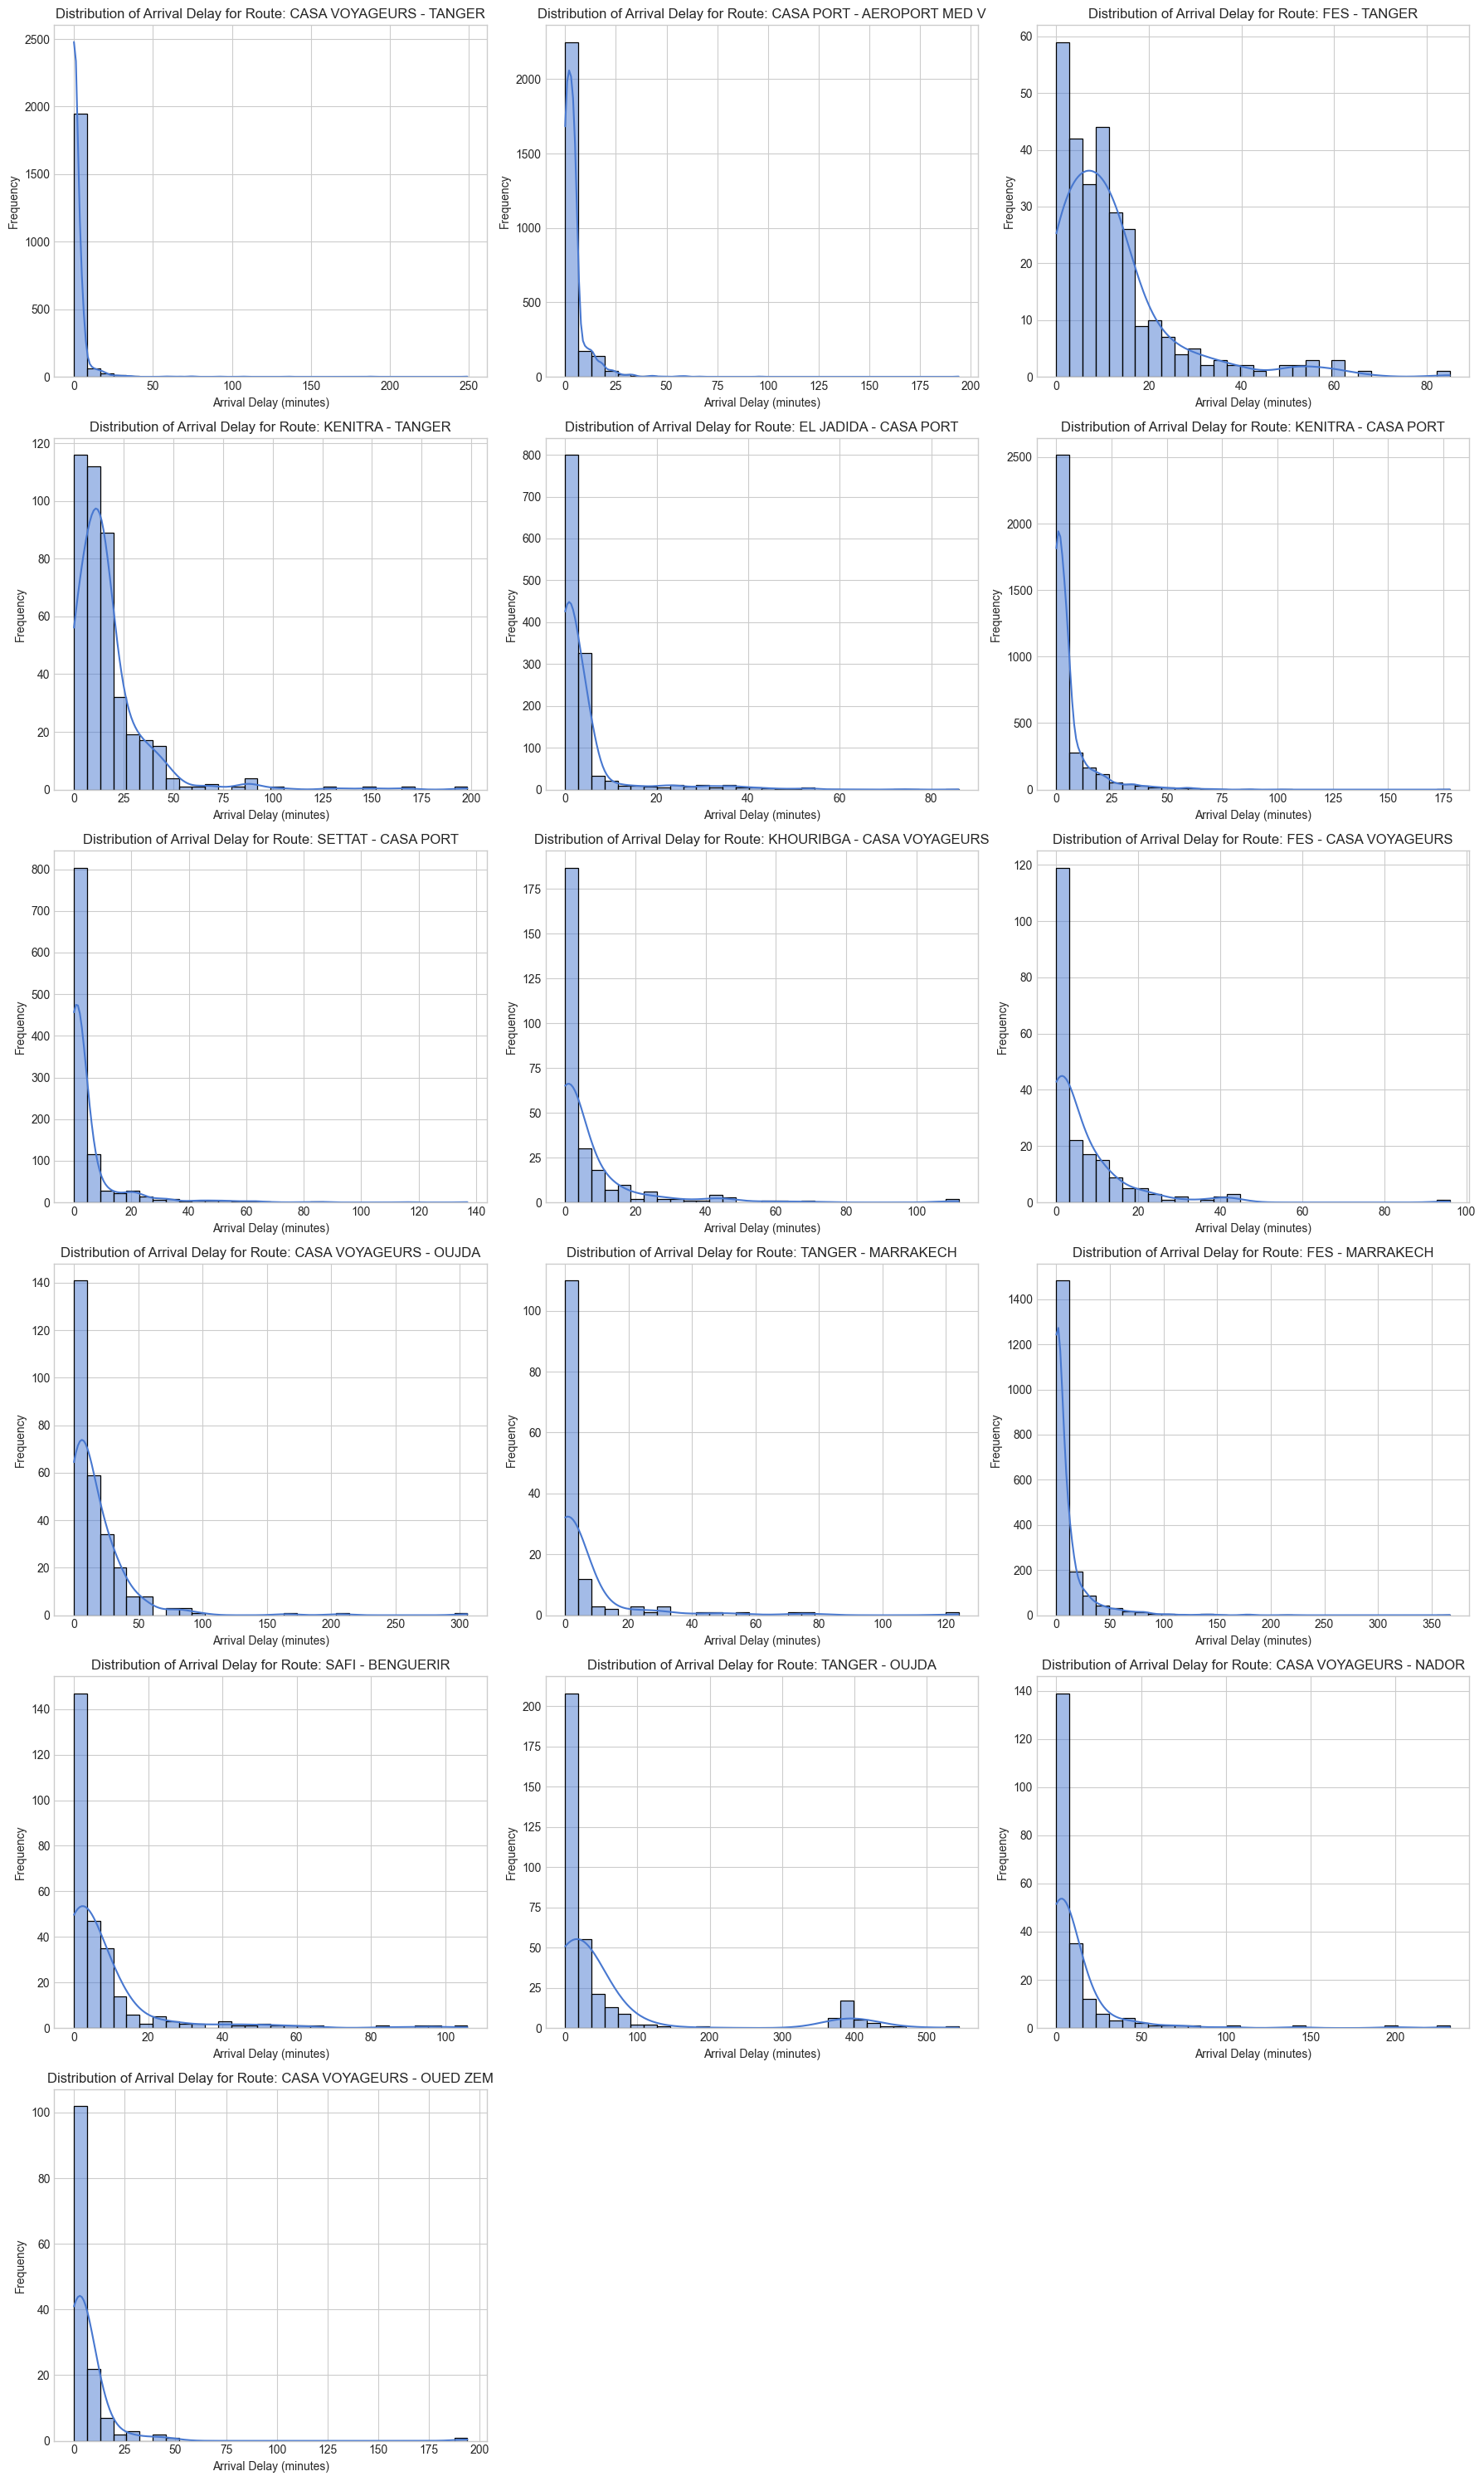

In [7]:
# distribution of delay frequency for each route
routes = df[df.next_station == df.final_arrival_station]['route'].unique()
n_routes = len(routes) //2 + 1
n_cols = 3
n_rows = int(np.ceil(n_routes / n_cols))
_passed = set()
_index = 0
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), squeeze=False)
for idx, route in enumerate(routes):
    if route.split(' - ')[1] + ' - ' + route.split(' - ')[0] in _passed:
        continue
    _passed.add(route)
    row, col = divmod(_index, n_cols)
    _index += 1
    # group = df[(df.current_station == df.final_arrival_station) & (df.route == route)]
    group = df[(df.next_station == df.final_arrival_station) & ((df.initial_departure_station == route.split(' - ')[0]) & (df.final_arrival_station == route.split(' - ')[1]) | (df.initial_departure_station == route.split(' - ')[1]) & (df.final_arrival_station == route.split(' - ')[0]))]
    sns.histplot(group['arrival_delay'], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of Arrival Delay for Route: {route}')
    axes[row, col].set_xlabel('Arrival Delay (minutes)')
    axes[row, col].set_ylabel('Frequency')


# Hide any unused subplots
for idx in range(n_routes, n_rows * n_cols):
    row, col = divmod(idx, n_cols)
    axes[row, col].set_visible(False)
# save the plot
fig.savefig(f'../screenshots/arrival_delay_distribution.png', bbox_inches='tight')

plt.tight_layout()
plt.show()

In [8]:
for col in ['day_of_week', 'arrival_hour', 'departure_hour' ,'train_type', 'route']:
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    stats = df.groupby(col)['arrival_delay'].agg(['mean', 'std', 'count']).reset_index()
    fig.add_trace(
        go.Bar(
            x=stats[col],
            y=stats['mean'],
            name="Average Arrival Delay",
            marker_color='rgb(55, 83, 109)',
            error_y=dict(
                type='data',
                array=stats['std'] / np.sqrt(stats['count']),
                visible=True
            )
        ),
        secondary_y=False,
    )
    fig.add_trace(
        go.Scatter(
            x=stats[col],
            y=stats['count'],
            name="Number of Trips",
            mode='lines+markers',
            marker=dict(size=8, color='rgb(227, 119, 194)'),
            line=dict(width=2)
        ),
        secondary_y=True,
    )
    fig.update_layout(
        title_text=f"Average Arrival Delay and Number of Trips by {col.replace('_', ' ').title()}",
        xaxis_title=col.replace('_', ' ').title(),
        yaxis_title="Average Arrival Delay (minutes)",
        yaxis2_title="Number of Trips",
        legend=dict(x=0.8, y=1.2),
        template='plotly_white'
    )
    # save the plot
    fig.write_image(f'../screenshots/arrival_delay_by_{col}.png', width=1200, height=600)
    fig.show()


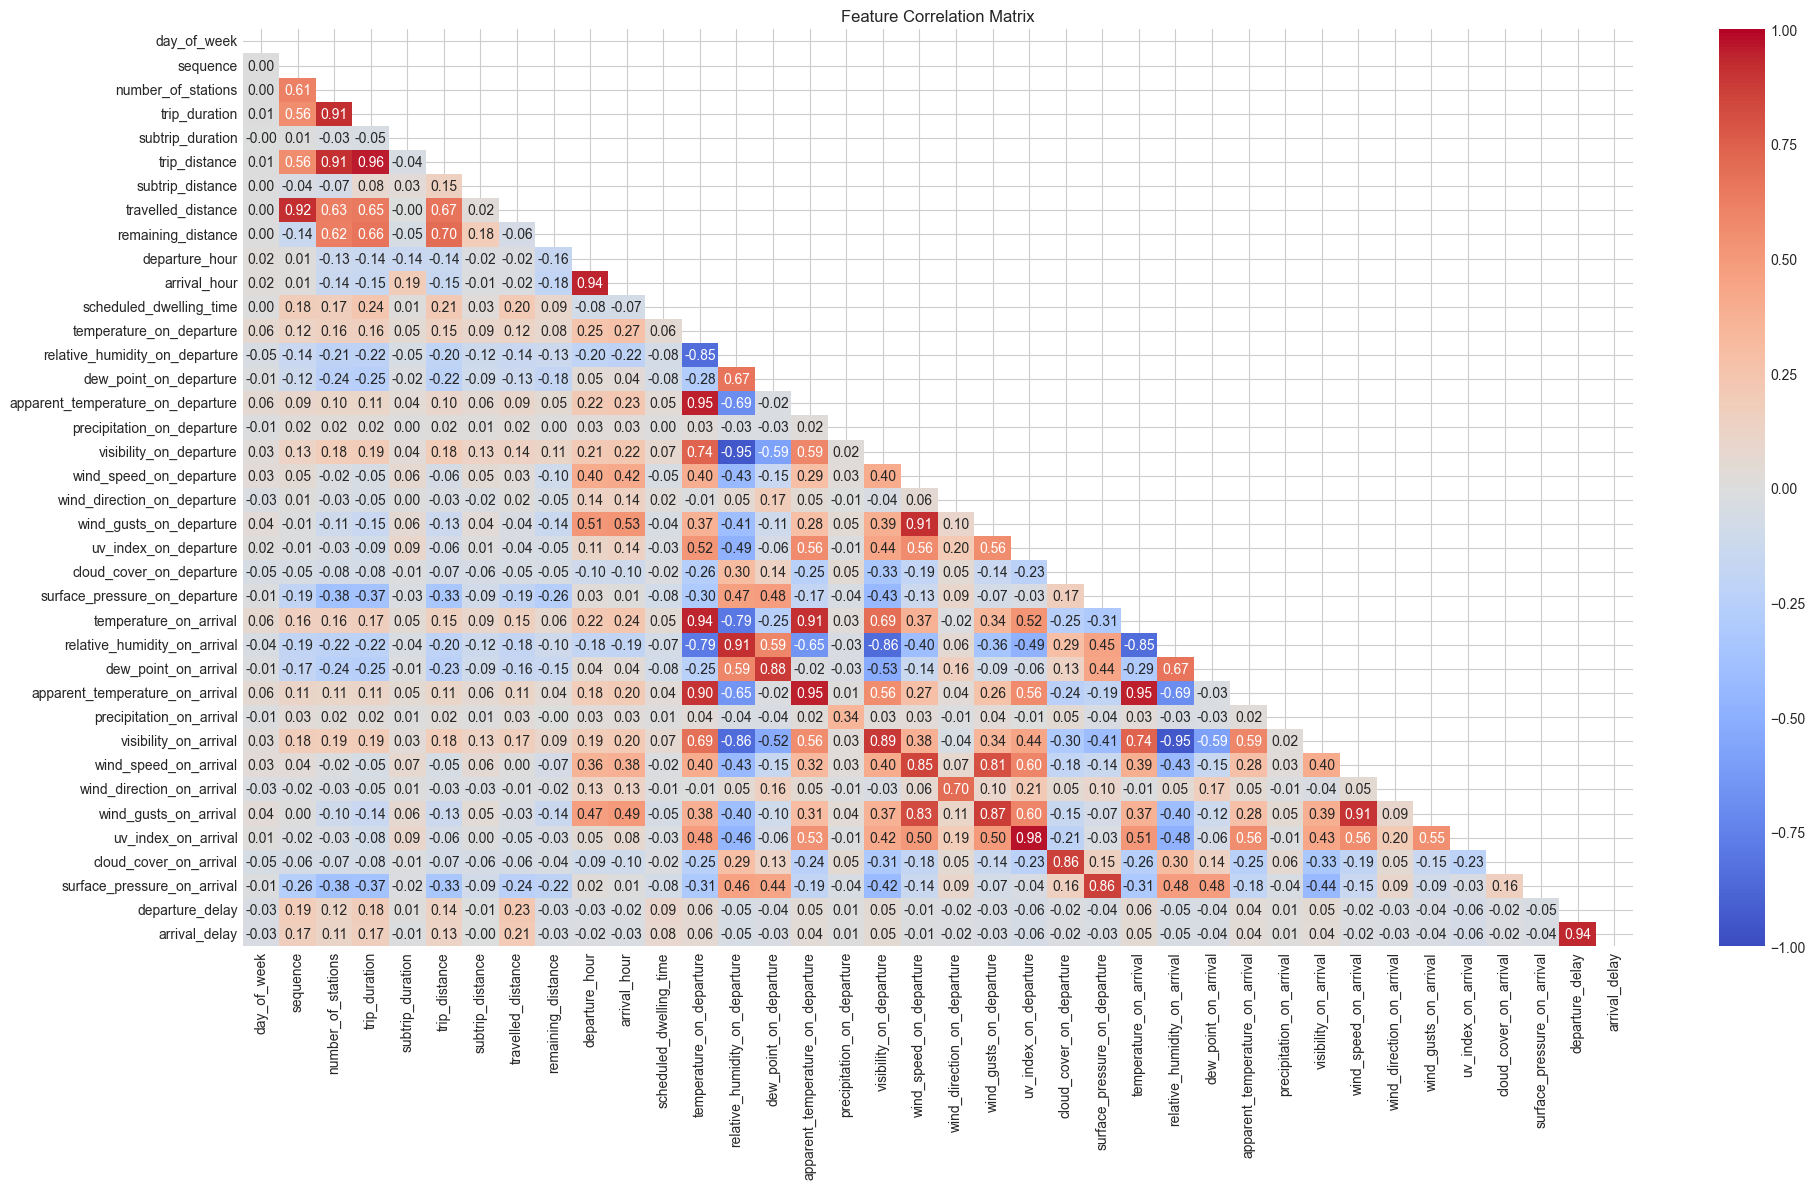

In [9]:
df2 = df.copy()
df2['departure_delay'] = df2.pop('departure_delay')
df2['arrival_delay'] = df2.pop('arrival_delay')
correlation_matrix = df2.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
# save the plot
plt.savefig('../screenshots/feature_correlation_matrix.png')
plt.show()